# Earthquake Damage Prediction

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('EQ_Damage.csv')

C:\Data\Anaconda\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (37,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Exploratory Data Analysis

In [11]:
damage_grade_updated = df['damage_grade'].replace(to_replace ='Grade ', value='',regex = True )
df['damage_grade']=damage_grade_updated

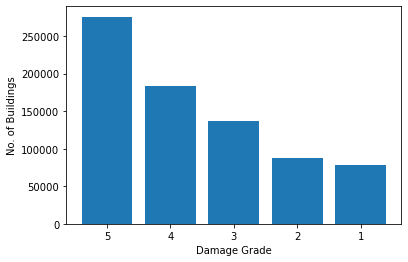

In [12]:
plt.bar(df['damage_grade'].value_counts().index,df['damage_grade'].value_counts())
plt.xlabel("Damage Grade")
plt.ylabel("No. of Buildings")
plt.show()

In [13]:
list(df.columns)

['district_id',
 'vdcmun_id',
 'ward_id',
 'building_id',
 'damage_grade',
 'technical_solution_proposed',
 'damage_overall_collapse',
 'damage_overall_leaning',
 'damage_overall_adjacent_building_risk',
 'damage_foundation_severe',
 'damage_foundation_moderate',
 'damage_foundation_insignificant',
 'damage_roof_severe',
 'damage_roof_moderate',
 'damage_roof_insignificant',
 'damage_corner_separation_severe',
 'damage_corner_separation_moderate',
 'damage_corner_separation_insignificant',
 'damage_diagonal_cracking_severe',
 'damage_diagonal_cracking_moderate',
 'damage_diagonal_cracking_insignificant',
 'damage_in_plane_failure_severe',
 'damage_in_plane_failure_moderate',
 'damage_in_plane_failure_insignificant',
 'damage_out_of_plane_failure_severe',
 'damage_out_of_plane_failure_moderate',
 'damage_out_of_plane_failure_insignificant',
 'damage_out_of_plane_failure_walls_ncfr_severe',
 'damage_out_of_plane_failure_walls_ncfr_moderate',
 'damage_out_of_plane_failure_walls_ncfr_insig

In [23]:
rel_df=df[[
 'district_id',
 'vdcmun_id',
 'damage_grade',
 'count_floors_pre_eq',  
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_geotechnical_risk',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other', 
 'condition_post_eq',   
         ]]

In [27]:
rel_df=rel_df.dropna()

In [28]:
rel_df['damage_grade'] = rel_df['damage_grade'].astype(float)

C:\Data\Anaconda\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='has_geotechnical_risk', ylabel='count'>

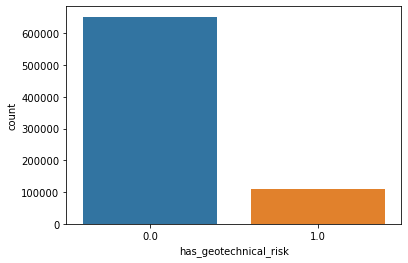

In [29]:
sns.countplot(rel_df['has_geotechnical_risk'])

C:\Data\Anaconda\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='foundation_type', ylabel='count'>

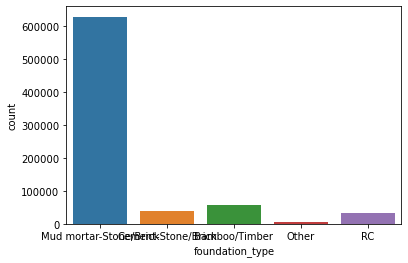

In [50]:
sns.countplot(rel_df['foundation_type'])

<AxesSubplot:xlabel='has_geotechnical_risk', ylabel='damage_grade'>

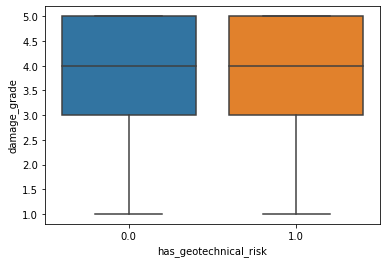

In [30]:
sns.boxplot(x='has_geotechnical_risk',y='damage_grade',data=rel_df)

<AxesSubplot:xlabel='damage_grade', ylabel='height_ft_pre_eq'>

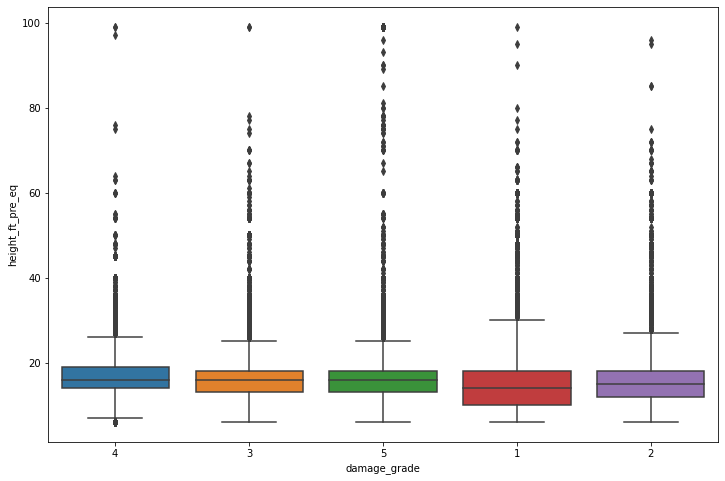

In [52]:
plt.figure(figsize=(12,8))
#sns.boxplot(x='damage_grade',y='height_ft_post_eq',data=df)
sns.boxplot(x='damage_grade',y='height_ft_pre_eq',data=df)


<AxesSubplot:xlabel='district_id', ylabel='vdcmun_id'>

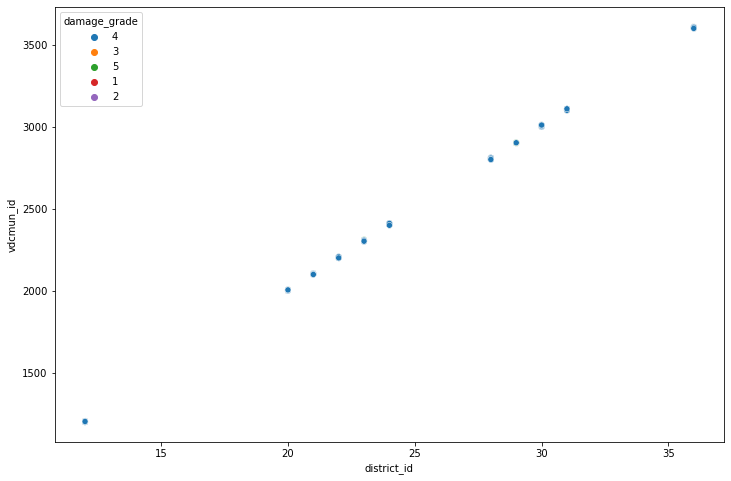

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='district_id',y='vdcmun_id',data=df,hue='damage_grade')


<AxesSubplot:xlabel='damage_grade', ylabel='plinth_area_sq_ft'>

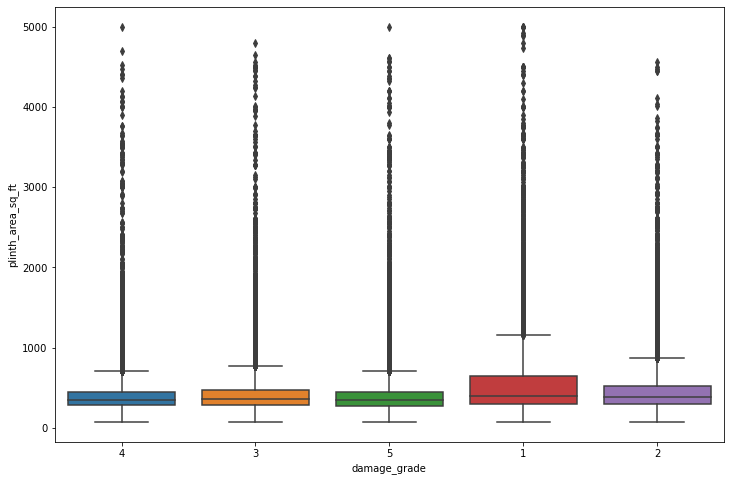

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x='damage_grade',y='plinth_area_sq_ft',data=df)

C:\Data\Anaconda\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_building', ylabel='Density'>

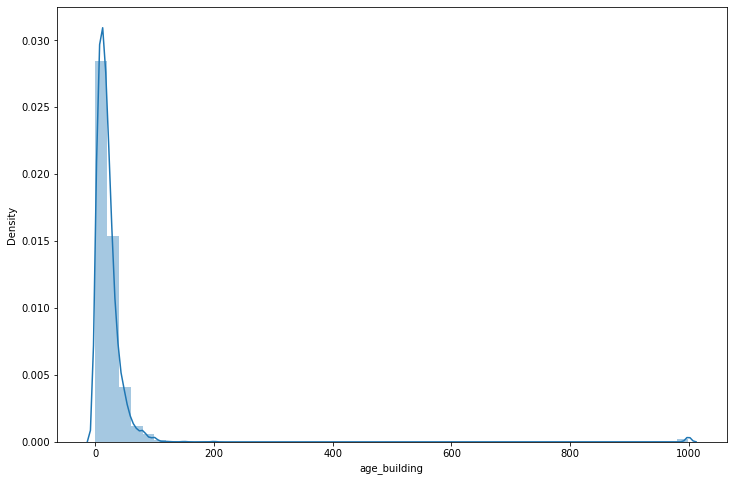

In [34]:
plt.figure(figsize=(12,8))
sns.distplot(rel_df['age_building'])

In [10]:
#count=rel_df['age_building'].value_counts()
#print(count.sort_index().to_string())
#print(count.sum())

In [11]:
#bins=[-1,10,25,50,1000]
#labels=["new","almost_new","old","very_old"]
#rel_df["age_binned"]=pd.cut(rel_df['age_building'], bins=bins,labels=labels)

In [12]:
#count=rel_df["age_binned"].value_counts()
#print(count.sort_index().to_string())
#print(count.sum())

In [13]:
#rel_df=rel_df.drop(columns=['age_building'])

In [14]:
#rel_df['net_rooms'] = rel_df.count_floors_post_eq - rel_df.count_floors_pre_eq
#rel_df['net_height'] = rel_df.height_ft_post_eq - rel_df.height_ft_pre_eq

In [15]:
#rel_df=rel_df[rel_df['age_building'] < 800]

In [16]:
#len(rel_df)

C:\Data\Anaconda\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_building', ylabel='Density'>

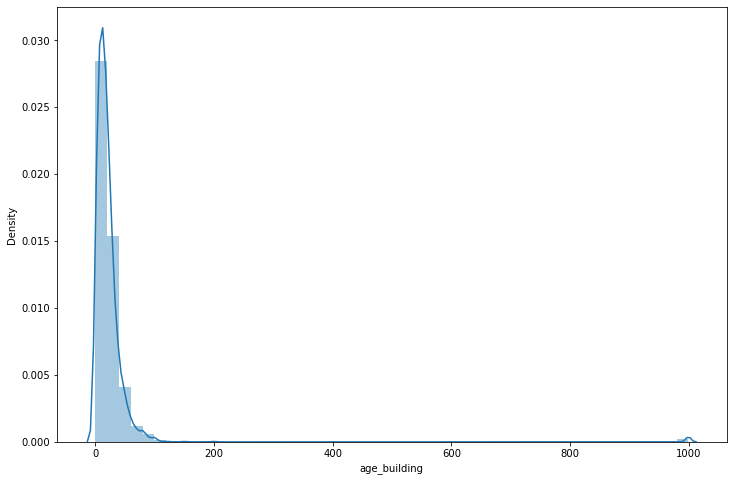

In [17]:
plt.figure(figsize=(12,8))
sns.distplot(rel_df['age_building'])

<AxesSubplot:xlabel='damage_grade', ylabel='age_building'>

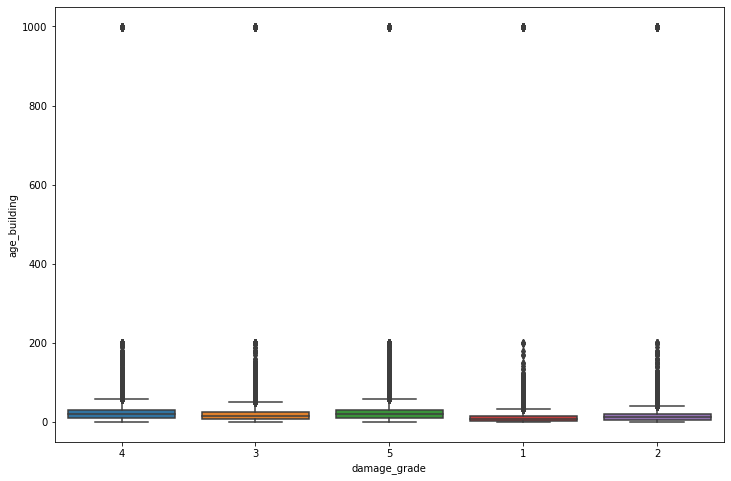

In [42]:
plt.figure(figsize=(12,8))
sns.boxplot(x='damage_grade',y='age_building',data=df)

In [35]:
rel_df.isnull().sum()

district_id                               0
vdcmun_id                                 0
damage_grade                              0
count_floors_pre_eq                       0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_geotechnical_risk                     0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [49]:
#df.groupby('foundation_type').mean()['damage_grade']
plt.figure(figsize=(12,8))
sns.boxplot(x='foundation_type',y='damage_grade',data=df)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 864x576 with 0 Axes>

In [36]:
rel_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
district_id,762094.0,25.767912,5.807569,12.0,22.0,24.0,30.0,36.0
vdcmun_id,762094.0,2582.695976,581.174161,1201.0,2204.0,2410.0,3010.0,3611.0
damage_grade,762094.0,3.643607,1.342606,1.0,3.0,4.0,5.0,5.0
count_floors_pre_eq,762094.0,2.087787,0.655104,1.0,2.0,2.0,2.0,9.0
age_building,762094.0,24.325031,65.034555,0.0,9.0,16.0,27.0,999.0
plinth_area_sq_ft,762094.0,406.673668,226.780437,70.0,280.0,358.0,470.0,5000.0
height_ft_pre_eq,762094.0,16.049424,5.493900,6.0,12.0,16.0,18.0,99.0
has_geotechnical_risk,762094.0,0.143876,0.350964,0.0,0.0,0.0,0.0,1.0
has_superstructure_adobe_mud,762094.0,0.042402,0.201504,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,762094.0,0.800269,0.399799,0.0,1.0,1.0,1.0,1.0


In [37]:
rel_df.dtypes

district_id                                 int64
vdcmun_id                                   int64
damage_grade                              float64
count_floors_pre_eq                       float64
age_building                              float64
plinth_area_sq_ft                         float64
height_ft_pre_eq                          float64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_geotechnical_risk                     float64
has_superstructure_adobe_mud              float64
has_superstructure_mud_mortar_stone       float64
has_superstructure_stone_flag             float64
has_superstructure_cement_mortar_stone    float64
has_superstructure_mud_mortar_brick       float64


In [24]:
#bins=np.arange(-5,100,10)
#bins=np.append(bins,30000)
#labels=np.arange(-5,100,10)
#rel_df["age_binned"]=pd.cut(rel_df['age_building'], bins=bins,labels=labels)

In [25]:
#age_count=rel_df["age_binned"].value_counts()
#print(age_count.sort_index().to_string())
#print(age_count.sum())

In [39]:
#rel_df=rel_df.drop(columns=['age_building'])
rel_df.head()

,district_id,vdcmun_id,damage_grade,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,12,1205,4.0,2.0,25.0,356.0,14.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Damaged-Not used
1,12,1207,4.0,2.0,30.0,275.0,12.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Damaged-Not used
2,12,1208,4.0,2.0,20.0,450.0,18.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Damaged-Not used
3,12,1201,4.0,2.0,12.0,240.0,8.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Damaged-Not used
4,12,1201,4.0,2.0,20.0,300.0,12.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Damaged-Used in risk


In [27]:
rel_df.dtypes

district_id                                 int64
vdcmun_id                                   int64
damage_grade                              float64
count_floors_pre_eq                       float64
age_building                              float64
plinth_area_sq_ft                         float64
height_ft_pre_eq                          float64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud              float64
has_superstructure_mud_mortar_stone       float64
has_superstructure_stone_flag             float64
has_superstructure_cement_mortar_stone    float64
has_superstructure_mud_mortar_brick       float64
has_superstructure_cement_mortar_brick    float64


In [28]:
# Generate our categorical variable lists
data_cat = rel_df.dtypes[rel_df.dtypes == "object"].index.tolist()
data_cat

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'condition_post_eq']

In [29]:
#data_cat.append("age_binned")
#data_cat

In [30]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [31]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(rel_df[data_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(data_cat)
encode_df.head()

C:\Data\Anaconda\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,land_surface_condition_Flat,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,roof_type_Bamboo/Timber-Heavy roof,roof_type_Bamboo/Timber-Light roof,...,plan_configuration_T-shape,plan_configuration_U-shape,condition_post_eq_Covered by landslide,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
# Merge one-hot encoded features and drop the originals
rel_m_df = rel_df.merge(encode_df,left_index=True, right_index=True)
rel_m_df = rel_m_df.drop(data_cat,1)
rel_m_df.head()

C:\Data\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,district_id,vdcmun_id,damage_grade,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_T-shape,plan_configuration_U-shape,condition_post_eq_Covered by landslide,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged
0,12,1205,4.0,2.0,25.0,356.0,14.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,1207,4.0,2.0,30.0,275.0,12.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,1208,4.0,2.0,20.0,450.0,18.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,1201,4.0,2.0,12.0,240.0,8.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,1201,4.0,2.0,20.0,300.0,12.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
list(rel_m_df.columns)

['district_id',
 'vdcmun_id',
 'damage_grade',
 'count_floors_pre_eq',
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'land_surface_condition_Flat',
 'land_surface_condition_Moderate slope',
 'land_surface_condition_Steep slope',
 'foundation_type_Bamboo/Timber',
 'foundation_type_Cement-Stone/Brick',
 'foundation_type_Mud mortar-Stone/Brick',
 'foundation_type_Other',
 'foundation_type_RC',
 'roof_type_Bamboo/Timber-Heavy roof',
 'roof_type_Bamboo/Timber-Light roof',
 'roof_type_RCC/RB/RBC',
 'ground_floor_type_Brick/Stone',
 'ground_floor_type_Mud',
 'ground_floor_type_Other',


In [34]:
rel_m_df=rel_m_df.drop(columns=['district_id','vdcmun_id',])
list(rel_m_df.columns)

['damage_grade',
 'count_floors_pre_eq',
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'land_surface_condition_Flat',
 'land_surface_condition_Moderate slope',
 'land_surface_condition_Steep slope',
 'foundation_type_Bamboo/Timber',
 'foundation_type_Cement-Stone/Brick',
 'foundation_type_Mud mortar-Stone/Brick',
 'foundation_type_Other',
 'foundation_type_RC',
 'roof_type_Bamboo/Timber-Heavy roof',
 'roof_type_Bamboo/Timber-Light roof',
 'roof_type_RCC/RB/RBC',
 'ground_floor_type_Brick/Stone',
 'ground_floor_type_Mud',
 'ground_floor_type_Other',
 'ground_floor_type_RC',
 'gro

In [35]:
# Split our preprocessed data into our features and target arrays
yy = rel_m_df.damage_grade
X = rel_m_df.drop(columns=["damage_grade"])

In [36]:
y= pd.get_dummies(yy)

In [37]:
y = y.values

In [38]:
X=X.values

In [39]:
X

array([[  2.,  25., 356., ...,   0.,   0.,   0.],
       [  2.,  30., 275., ...,   0.,   0.,   0.],
       [  2.,  20., 450., ...,   0.,   0.,   0.],
       ...,
       [  2.,  18., 155., ...,   0.,   1.,   0.],
       [  2.,  35., 425., ...,   0.,   0.,   0.],
       [  2.,  32., 416., ...,   0.,   0.,   0.]])

In [40]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [41]:
(y_train)

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [42]:
#from imblearn.combine import SMOTEENN

#smote_enn = SMOTEENN(random_state=0)
#X_resampled, y_resampled = smote_enn.fit_resample(X_train,y_train)

In [43]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [44]:
X_train_scaled[0]

array([-1.35089505e-01, -2.20623458e-01,  4.12311261e-01, -1.28487829e+00,
       -2.10486211e-01, -2.00103286e+00, -1.90640992e-01, -1.27367660e-01,
       -1.53475867e-01,  3.59768723e+00, -5.91208734e-01, -2.96055944e-01,
       -2.03895803e-01, -1.28919290e-01, -1.10340844e-01, -2.19939660e+00,
        2.49175218e+00, -1.83548312e-01,  3.49881575e+00, -2.32556478e-01,
       -2.17252551e+00, -7.72323608e-02, -2.09573520e-01, -6.24455113e-01,
        7.16018587e-01, -2.48988313e-01, -3.08197888e-01, -2.07455706e+00,
        2.69991013e+01, -3.25388901e-01, -6.86244214e-02, -4.29397350e-01,
       -2.11549140e-01, -1.33167806e+00,  2.27389575e+00, -4.52623398e-01,
       -1.90744464e-01, -4.13588218e-02,  5.10677299e-01, -1.16077152e-02,
       -1.30955095e-02, -1.04994449e-02, -1.15676649e-01, -3.51925395e-02,
       -2.63976292e-02,  2.05348362e-01, -1.53613159e-01, -3.56874661e-02,
       -2.41446433e-02, -2.21784949e-02, -6.12602505e-01, -4.06156833e-01,
       -2.13213780e-01, -

# Nueral Network Model

In [45]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [46]:
# First define baseline model. Then use it in Keras Classifier for the training
model = Sequential()
model.add(Dense(120, input_dim = len(X_train_scaled[0]), activation = 'relu')) 
model.add(Dense(120, activation = 'relu'))
model.add(Dense(5, activation = 'sigmoid')) 
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])

In [47]:
fit_model=model.fit(X_train_scaled, y_train, epochs=1)

17861/17861 [==============================] - 19s 1ms/step - loss: 1.0203 - categorical_accuracy: 0.5940


In [48]:
NN_predictions = model.predict(X_test_scaled)

5954/5954 [==============================] - 4s 715us/step


In [49]:
from sklearn.metrics import confusion_matrix
y_p=np.argmax(NN_predictions, axis=1)
y_t=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t,y_p)
print(cm)
print("-------------------------------------------------")
print((cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]).diagonal())

[[11002  3922   301  2501  1856]
 [ 1793  8816   302 10294   792]
 [ 3034  4138  1080 14917 10915]
 [  743  2239   281 41148  1470]
 [ 1487  1587   574 13118 52208]]
-------------------------------------------------
[0.56184251 0.40078192 0.03168642 0.89684183 0.7569229 ]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


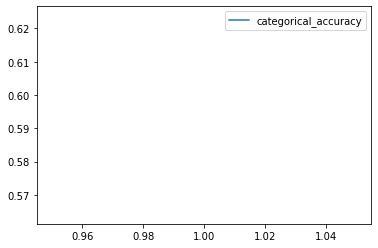

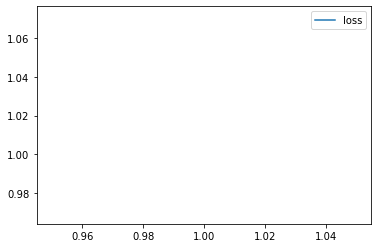

In [50]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))
# Plot the accuracy
print(history_df.plot(y="categorical_accuracy"))
print(history_df.plot(y="loss"))

In [51]:
from sklearn.metrics import precision_recall_curve, roc_curve
# precision recall curve
precision = dict()
recall = dict()
for i in range(5):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        NN_predictions[:, i])
#   plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    print(precision[i])
#plt.xlabel("recall")
#plt.ylabel("precision")
#plt.legend(loc="best")
#plt.title("precision vs. recall curve")
#plt.show()

[0.10288122 0.10287651 0.10287705 ... 1.         1.         1.        ]
[0.11549528 0.11549064 0.11549124 ... 0.5        1.         1.        ]
[0.17898722 0.17898291 0.17898385 ... 0.         0.         1.        ]
[0.24435722 0.24435319 0.2443545  ... 1.         1.         1.        ]
[0.36327535 0.36327199 0.36327391 ... 1.         1.         1.        ]


# Balanced Random Forest Classifier

In [52]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Define the model
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# fit the model
brf_model = brf_model.fit(X_train_scaled, y_train)

# Predict 
predictions = brf_model.predict(X_test_scaled)

In [53]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from imblearn.metrics import classification_report_imbalanced

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.61      0.55      0.58     19582
           1       0.41      0.28      0.33     21997
           2       0.33      0.07      0.11     34084
           3       0.62      0.41      0.49     45881
           4       0.85      0.63      0.72     68974

   micro avg       0.67      0.43      0.52    190518
   macro avg       0.56      0.39      0.45    190518
weighted avg       0.63      0.43      0.50    190518
 samples avg       0.43      0.43      0.43    190518



C:\Data\Anaconda\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train_scaled, y_train)

In [ ]:
knn_predictions = knn.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test_final,knn_predictions))

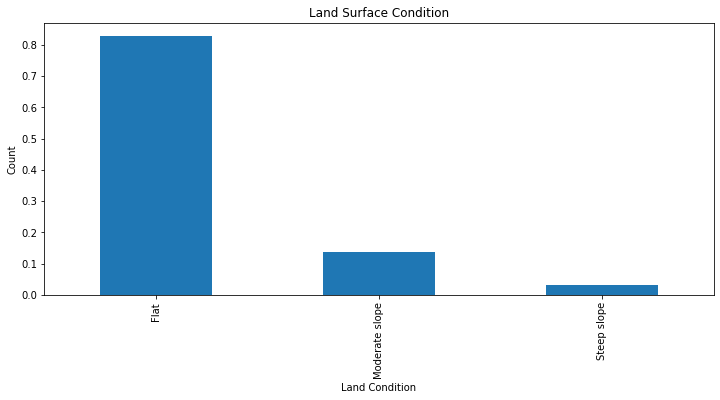

In [33]:
plt.figure(figsize=(12,5))
ax = rel_df.land_surface_condition.value_counts(normalize = True).plot(kind = "bar")

plt.title("Land Surface Condition")
plt.ylabel("Count")
plt.xlabel("Land Condition")
plt.show()

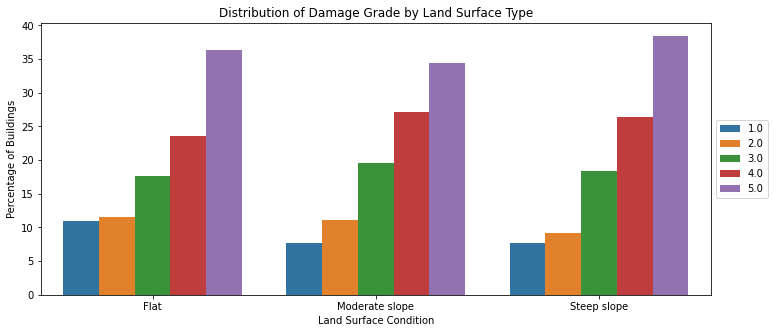

In [35]:
# Calculate counts
df_temp = rel_df.groupby(['land_surface_condition','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['land_surface_condition', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Plot chart
plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'land_surface_condition', 
                 y = 'count', 
                 hue = 'damage_grade')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Land Surface Type")
plt.xlabel("Land Surface Condition")
plt.ylabel("Percentage of Buildings")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


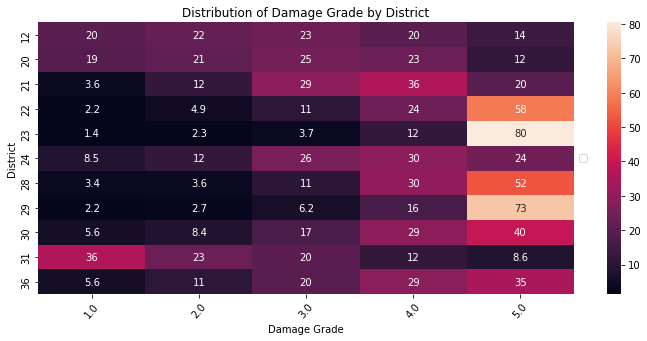

In [37]:
# Calculate counts
df_temp = rel_df.groupby(['district_id','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['district_id', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Pivot table
df_temp = pd.pivot_table(df_temp, values='count', index=['district_id'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12,5))
ax = sns.heatmap(data = df_temp, annot = True )
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by District")
plt.xlabel("Damage Grade")
plt.ylabel("District")
plt.show()

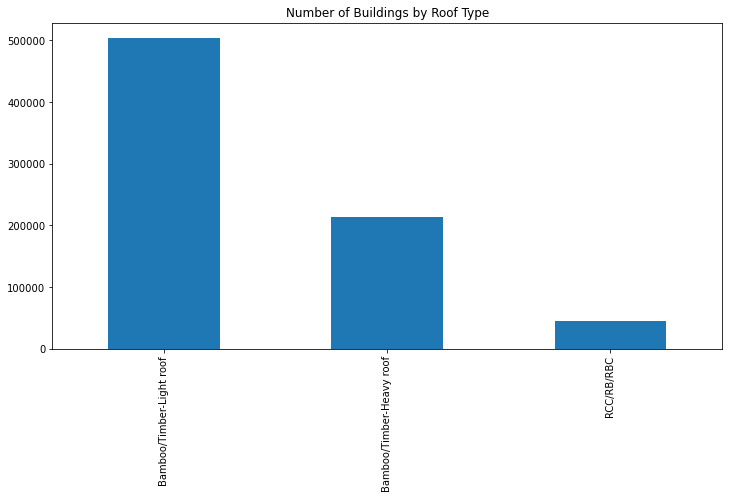

In [39]:
plt.figure(figsize = (12,6))
ax = rel_df.roof_type.value_counts().plot(kind = "bar")
plt.title("Number of Buildings by Roof Type")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


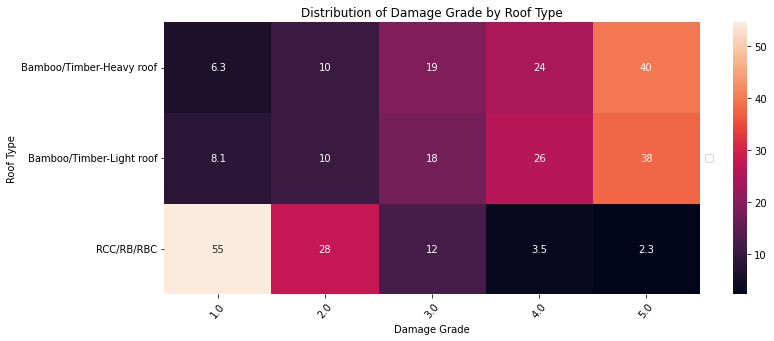

In [40]:
# Calculate counts
df_temp = rel_df.groupby(['roof_type','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['roof_type', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Pivot table
df_temp = pd.pivot_table(df_temp, values='count', index=['roof_type'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12,5))
ax = sns.heatmap(data = df_temp, annot = True )
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Roof Type")
plt.xlabel("Damage Grade")
plt.ylabel("Roof Type")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


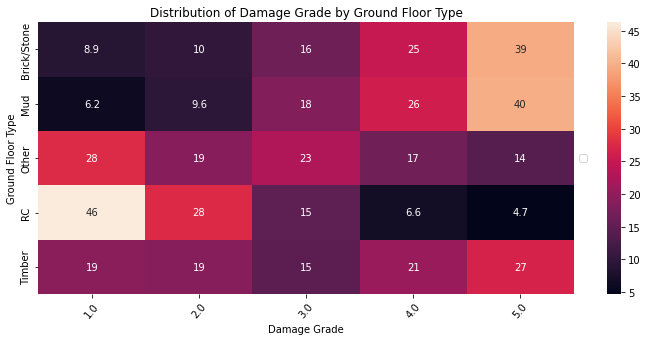

In [41]:
# Calculate counts
df_temp = rel_df.groupby(['ground_floor_type','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['ground_floor_type', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Pivot table
df_temp = pd.pivot_table(df_temp, values='count', index=['ground_floor_type'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12,5))
ax = sns.heatmap(data = df_temp, annot = True )
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Ground Floor Type")
plt.xlabel("Damage Grade")
plt.ylabel("Ground Floor Type")
plt.show()


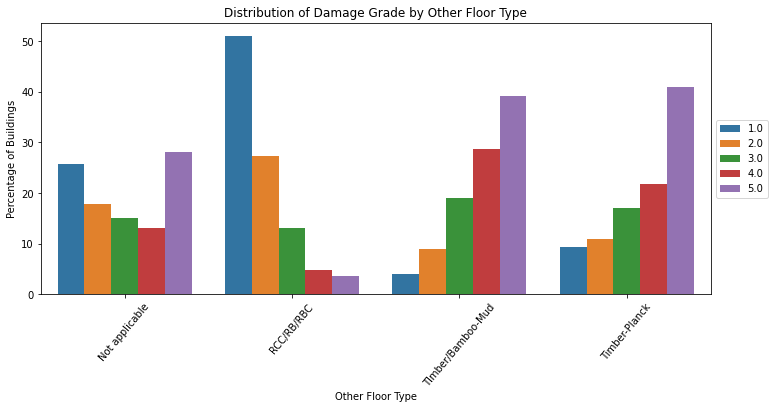

In [43]:
# Calculate counts
df_temp = rel_df.groupby(['other_floor_type','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['other_floor_type', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Plot char
plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'other_floor_type', 
                 y = 'count', 
                 hue = 'damage_grade')

plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Other Floor Type")
plt.xlabel("Other Floor Type")
plt.ylabel("Percentage of Buildings")
plt.show()



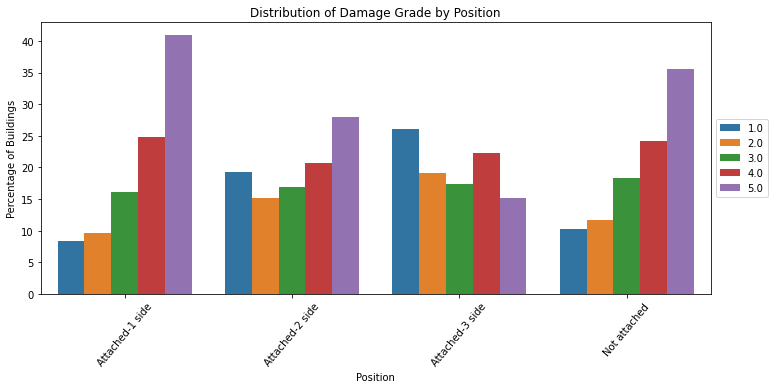

In [44]:
# Calculate counts
df_temp = rel_df.groupby(['position','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['position', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Plot char
plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'position', 
                 y = 'count', 
                 hue = 'damage_grade')

plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Position")
plt.xlabel("Position")
plt.ylabel("Percentage of Buildings")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


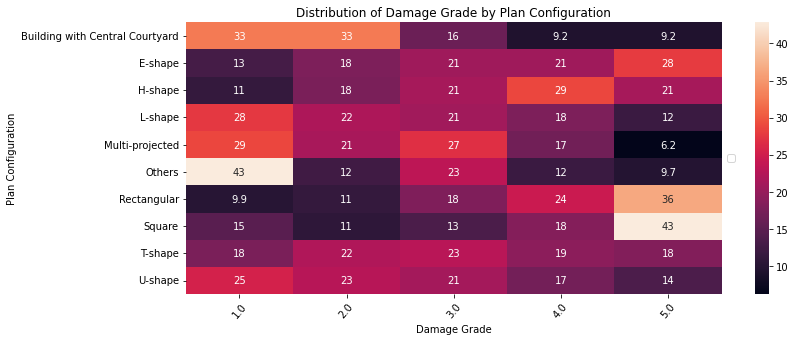

In [45]:
# Calculate counts
df_temp = rel_df.groupby(['plan_configuration','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['plan_configuration', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Pivot table
df_temp = pd.pivot_table(df_temp, values='count', index=['plan_configuration'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12,5))
ax = sns.heatmap(data = df_temp, annot = True )
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Plan Configuration")
plt.xlabel("Damage Grade")
plt.ylabel("Plan Configuration")
plt.show()
